# Problem 1: Classification

You are required to implement a single layer neural network (*perceptron*) and to evaluate its effectiveness on a classification problem. You will deal with two classes, C1 and C2, where each object is represented by two *features* X1 and X2.

## Exercise 1.1

In this part, you will play the role of the *oracle*. The requirements for generating the data points are the following.

+ you have N = 250 points per class;
+ the probability distribution for X1 for each class is following::
    1. class 1, a normal distribution with mean 0.5 and standard deviation 1.5
    2. class 2, a normal distribution with mean 5.4 and standard deviation 0.5
+ the probability distribution for X2 for each class is the following:
    1. class 1, a Poisson distribution with lambda 1.5
    2. class 2, an exponential distribution with *scale* parameter equal to 2
+ for class 1, you will use the label +1, for class 2 the label -1.
+ before generating the data, set the random seed equal to the last four digits of your student id (i.e., if your student id is 2004312, the seed will be 4312)

In [153]:
import numpy as np

N = 250

np.random.seed(1855)

# class X1
x11 = np.random.normal(loc=0.5, scale = 1.5, size=N)
x12 = np.random.normal(loc=5.4, scale= 0.5, size = N)
y1 = -np.ones(N)

# class X2
x21 = np.random.poisson(lam=1.5, size = N)
x22 = np.random.exponential(scale=2, size = N)
y2 = np.ones(N)


## Exercise 1.2 

Draw a scatter plot to show the distribution of points of the two classes.

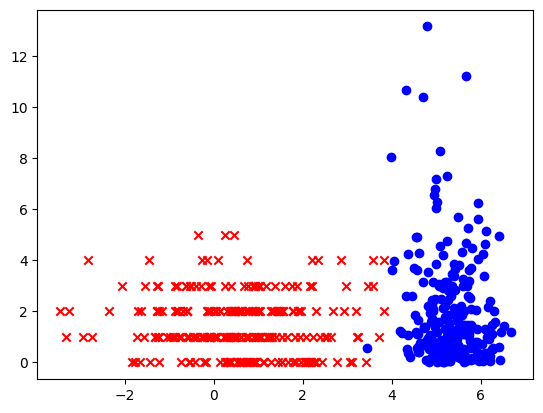

In [154]:
import matplotlib.pyplot as plt
plt.scatter(x11, x21, c='red', marker='x')
plt.scatter(x12, x22, c = 'blue', marker = 'o')

## Exercise 1.3

Create the matrix of points X (each row is an object, each column a feature). Do not forget to add the bias X0.
Create the output vector y.


In [155]:
X = np.stack((np.ones(2*N), np.concatenate((x11, x12)), np.concatenate((x21, x22))), axis = 1)

In [156]:
y = np.concatenate((y1, y2))

## Exercise 1.4

Train a *perceptron* using a **mini-batch stochastic gradient descent approach** with the following requirements:
+ initialize the vector of parameters *w* with a normal distribution with mean 0 and standard deviation
+ Set the parameter *eta* equal to 1e-4
+ Use a mini-batch of size 20
+ Set the maximum number of epochs equal to 500
+ Save in a vector named [errors_epoch] the number of misclassified objects for each epoch.

In [157]:
class Perceptron:
  def __init__(self, eta = 1e-4, batch_size = 20, max_epochs =500):
    self.eta = eta
    self.batch_size = batch_size
    self.max_epochs = max_epochs
    self.weights = None
    self.error_epoch = np.zeros(max_epochs)
  
  def activate(self, X):
    return X
  
  def predict(self, X):
    output = X @ self.weights
    return np.where(output > 0, 1, -1)
  
  def sse(self, X, y):
    return np.sum((y - self.predict(X))**2)
  
  def train(self, X, y):
    self.weights = np.random.randn(X.shape[1])
    
    n_samples = len(X)
    
    for epoch in range(self.max_epochs):
      indices = np.random.permutation(n_samples)
      for start in range(0, n_samples, self.batch_size):
        end = start + self.batch_size
        batch_indices = indices[start:end]
        X_batch, y_batch = X[batch_indices], y[batch_indices]
        predictions = self.predict(X_batch)
        updates = self.eta * (y_batch - predictions)
        self.weights+= np.dot(X_batch.T, updates)
      self.error_epoch[epoch] = np.sum((y *  np.sign(X @ self.weights)) < 0)
    return self.weights
    

In [158]:
perceptron= Perceptron()
w = perceptron.train(X, y)
error_epoch = perceptron.error_epoch


## Exercise 1.5

Draw two plots: the first plot shows the data points and the separating hyperplane; the second plot, the trend of the number of errors per epoch.


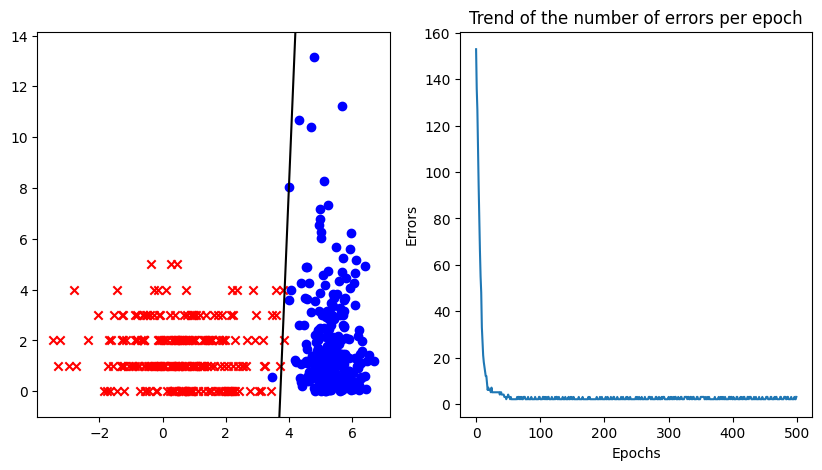

In [159]:

fig, ax = plt.subplots( figsize=(10, 5), ncols=2)

ax[1].plot(range(perceptron.max_epochs), error_epoch)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Errors')
ax[1].set_title('Trend of the number of errors per epoch')



ax[0].scatter(x11, x21, c='red', marker='x')
ax[0].scatter(x12, x22, c = 'blue', marker = 'o')

ax[0].set_ylim(np.min(X[:, 2]) -1, np.max(X[:, 2]) + 1)

intercept = -w[0]/w[2]
slope = -w[1]/w[2]
x = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y = slope * x + intercept
ax[0].plot(x, y, color='black')


# Problem 2: Regression

You are required to build a closed-form solution for the regression problem.


## Exercise 2.1

You will play the role of the *oracle* once again. The requirements are the following:
+ the target function is a cubic function aX^3 + bX^2 + cX + d with values a = 1.5, b = -1, c = 2, d = 3. 
+ You have also some gaussian noise added to the data points with mean 0 and standard deviation 1.5.
+ The target function is sampled using the values already created for coordinate X1 during the previous problem.

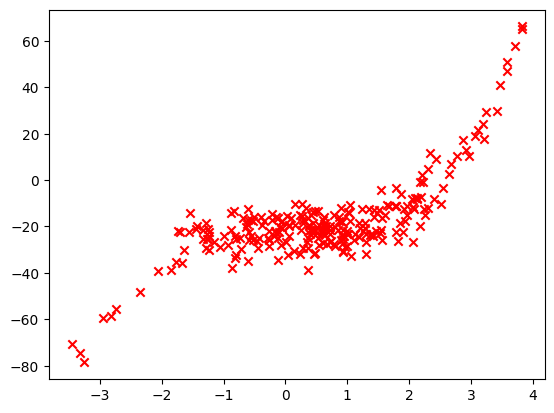

In [160]:
# write your answer here
a = 1.5
b = -1
c = 2
d = 3
noise = np.random.normal(loc=0, scale=1.5, size=N)
y = a*x11**3 + b*x12**2 + c*x21 + d + noise
plt.scatter(x11, y, c='red', marker='x')



## Exercise 2.2

Your hypothesis set *H(x)* is a polynomial function with degree equal 2. Generate the dataset *X_reg* following this hypothesis (including the bias term X0).


In [171]:
# write your answer here
# create (quadtratic) data matrix
X_reg = np.stack((np.ones(N), x11, x11**2, x11**3), axis = 1)



## Esercise 2.3

Find the optimal vector of parameters *w_reg* using the closed form solution.

In [172]:
# write your answer here
# find closed form solution
# w = (X^T  X)^-1 (X^T y)
w = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ y


## Exercise 2.4

Draw the points of the dataset together with your solution.

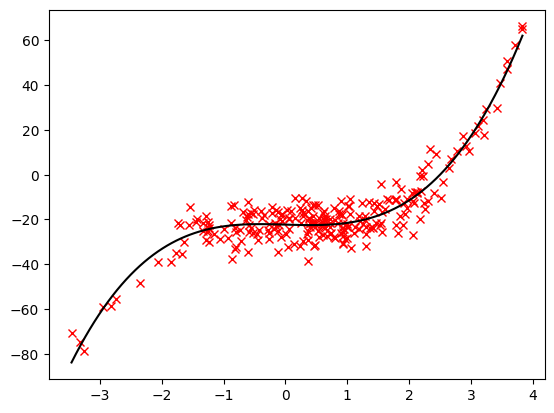

In [173]:
# plot points

plt.plot(x11, y, 'x', color='red')


# generate grid of points

x_grid = np.linspace(np.min(x11), np.max(x11), 100)

# plot line

y_pred = w[0] + w[1]*x_grid + w[2]*x_grid**2 + w[3]*x_grid**3
plt.plot(x_grid, y_pred, color='black')
